In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [32]:
def prepare_data(timeseries_data, n_features):
  X, y = [], []
  for i in range(len(timeseries_data)):
    end_ix = i + n_features
    if end_ix > len(timeseries_data) - 1:
      break
    seq_x, seq_y = timeseries_data[i: end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [33]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [34]:
print(X), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [35]:
X.shape

(6, 3)

In [36]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

**Building LSTM model**

In [37]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences= True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X, y, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32143.9004
Epoch 2/300
1/1 [==============================] - 0s 27ms/step - loss: 31774.5879
Epoch 3/300
1/1 [==============================] - 0s 21ms/step - loss: 31394.3184
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 30990.9590
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 30551.3965
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 30062.3809
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 29514.0566
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 28903.1543
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 28241.2559
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 27543.7578
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 26814.7344
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 26064.4082
Epo

**Predicting for the next 10 days**

In [38]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i < 10):
  if(len(temp_input) > 3):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print('{} day output {}'.format(i, yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    lst_output.append(yhat[0][0])
    i = i+1
  else:
    x_input = x_input.reshape(1, n_steps, n_features)
    yhat = model.predict(x_input,  verbose = 0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i = i+1
print(lst_output)

[226.41881]
1 day output [[238.69713]]
2 day output [[254.93845]]
3 day output [[271.6268]]
4 day output [[287.41342]]
5 day output [[305.75754]]
6 day output [[324.52753]]
7 day output [[343.81943]]
8 day output [[364.94653]]
9 day output [[386.8993]]
[226.41881, 238.69713, 254.93845, 271.6268, 287.41342, 305.75754, 324.52753, 343.81943, 364.94653, 386.8993]


In [39]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [40]:
len(timeseries_data)

9

In [41]:
lst_output

[226.41881,
 238.69713,
 254.93845,
 271.6268,
 287.41342,
 305.75754,
 324.52753,
 343.81943,
 364.94653,
 386.8993]

**Visualizing The Output**

In [42]:
import matplotlib.pyplot as plt

In [43]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

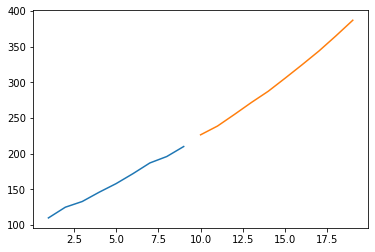

In [44]:
plt.plot(day_new,  timeseries_data)
plt.plot(day_pred, lst_output)